# Gradient Descent for Logistic Regression

In this lab, we will:
- update gradient descent for logistic regression.
- explore gradient descent on a familiar data set

In [4]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_common import  dlc, plot_data, plt_tumor_data, sigmoid, compute_cost_logistic
from plt_quad_logistic import plt_quad_logistic, plt_prob

### Data set 
We tart with the same two feature data set used in the decision boundary lab.

In [5]:
X_train = np.array([[0.5, 1.5], [1, 1], [1.5, 0.5],[3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

We'll use a helper function to plot this data. The data points with label $y=1$ are shown as red crosses, while the data points with label $y=0$ are shown as blue circles.

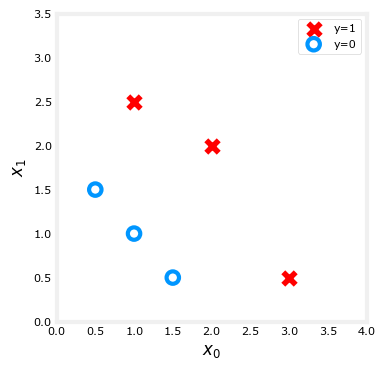

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
plot_data(X_train, y_train, ax)

ax.axis([0, 4, 0, 3.5])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
plt.show()

#### Gradient Descent Implementation

There are many ways to implement this. Outlined below is this:
- Initialize variables to accumulate `dj_dw` and `dj_db`
- For each example
    - calculate the error for that example $g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b) - \mathbf{y}^{(i)}$
    - for each input value $x_{j}^{(i)}$ in this example,  
        - multiply the error by the input  $x_{j}^{(i)}$, and add to the corresponding element of `dj_dw`. (equation 2 above)
    - add the error to `dj_db` (equation 3 above)

- Divide `dj_db` and `dj_dw` by total number of examples (m)
- Note that $\mathbf{x}^{(i)}$ in numpy `X[i,:]` or `X[i]`  and $x_{j}^{(i)}$ is `X[i,j]`

In [7]:
def compute_gradient_logistic(X, y, w, b):
    """
    Computes the gradient for logistic regression 
 
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
    Returns
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar)      : The gradient of the cost w.r.t. the parameter b. 
    """
    m, n = X.shape
    dj_dw = np.zeros((n,))  # (n,)
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i], w) + b)  # (n,)(n,)=scalar
        err_i = f_wb_i - y[i]  # scalar
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i, j]  # scalar
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m  # (n,)
    dj_db = dj_db/m  # scalar

    return dj_db, dj_dw

Checking the implementation of the gradient function using the cell below.

In [8]:
X_tmp = np.array([[0.5, 1.5], [1, 1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2., 3.])
b_tmp = 1.
dj_db_tmp, dj_dw_tmp = compute_gradient_logistic(X_tmp, y_tmp, w_tmp, b_tmp)
print(f"dj_db: {dj_db_tmp}")
print(f"dj_dw: {dj_dw_tmp.tolist()}")

dj_db: 0.49861806546328574
dj_dw: [0.498333393278696, 0.49883942983996693]


### Gradient Descent Code

In [9]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters):
    """
    Performs batch gradient descent
    
    Args:
      X (ndarray (m,n)   : Data, m examples with n features
      y (ndarray (m,))   : target values
      w_in (ndarray (n,)): Initial values of model parameters  
      b_in (scalar)      : Initial values of model parameter
      alpha (float)      : Learning rate
      num_iters (scalar) : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,))   : Updated values of parameters
      b (scalar)         : Updated value of parameter 
    """
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  # avoid modifying global w within function
    b = b_in

    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Save cost J at each iteration
        if i < 100000:      # prevent resource exhaustion
            J_history.append(compute_cost_logistic(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")

    return w, b, J_history  # return final w,b and J history for graphing

Running gradient descent on our data set.

In [10]:
w_tmp = np.zeros_like(X_train[0])
b_tmp = 0.
alph = 0.1
iters = 10000

w_out, b_out, _ = gradient_descent(X_train, y_train, w_tmp, b_tmp, alph, iters)
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration    0: Cost 0.684610468560574   
Iteration 1000: Cost 0.1590977666870456   
Iteration 2000: Cost 0.08460064176930081   
Iteration 3000: Cost 0.05705327279402531   
Iteration 4000: Cost 0.042907594216820076   
Iteration 5000: Cost 0.034338477298845684   
Iteration 6000: Cost 0.028603798022120097   
Iteration 7000: Cost 0.024501569608793   
Iteration 8000: Cost 0.02142370332569295   
Iteration 9000: Cost 0.019030137124109114   

updated parameters: w:[5.28 5.08], b:-14.222409982019837


#### Plotting the results of gradient descent:

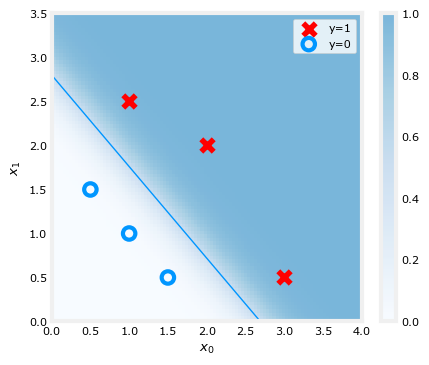

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
# plot the probability
plt_prob(ax, w_out, b_out)

# Plot the original data
ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')
ax.axis([0, 4, 0, 3.5])
plot_data(X_train, y_train, ax)

# Plot the decision boundary
x0 = -b_out/w_out[0]
x1 = -b_out/w_out[1]
ax.plot([0, x0], [x1, 0], c=dlc["dlblue"], lw=1)
plt.show()

In the plot above:
 - the shading reflects the probability y=1 (result prior to decision boundary)
 - the decision boundary is the line at which the probability = 0.5
 